# Decision Tree Classifier on Bank Dataset
### I had created a decision tree Machine Learning model using bank Dataset where model will create decision tree using various features to predict whether Customer will subscribed for Term deposit or not.

## Importing Dataset 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
49728,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
49729,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
49730,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no") 

## Data Preprocessing 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [5]:
data.duplicated().sum()

4521

In [6]:
data=data.drop_duplicates()

In [7]:
data.drop(columns=['day','month','duration','campaign','pdays','previous'],inplace=True)
data

C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_6336\93092848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['day','month','duration','campaign','pdays','previous'],inplace=True)


,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
49727,51,technician,married,tertiary,no,825,no,no,cellular,unknown,yes
49728,71,retired,divorced,primary,no,1729,no,no,cellular,unknown,yes
49729,72,retired,married,secondary,no,5715,no,no,cellular,success,yes
49730,57,blue-collar,married,secondary,no,668,no,no,telephone,unknown,no


## Data Normalization 

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()   ###Defining LabelEncoder
def labelencoderconvert(a):
    le.fit(data[a].values)    ###Training dataset
    data[a]=le.transform(data[a].values)  ### Implemnenting Label Encoder


In [9]:
labelencoderconvert('job')
labelencoderconvert('marital')
labelencoderconvert('education')
labelencoderconvert('default')
labelencoderconvert('housing')
labelencoderconvert('loan')
labelencoderconvert('contact')
labelencoderconvert('poutcome')
labelencoderconvert('y')
data

C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_6336\1972417709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[a]=le.transform(data[a].values)  ### Implemnenting Label Encoder
C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_6336\1972417709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[a]=le.transform(data[a].values)  ### Implemnenting Label Encoder
C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_6336\1972417709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
0,30,10,1,0,0,1787,0,0,0,3,0
1,33,7,1,1,0,4789,1,1,0,0,0
2,35,4,2,2,0,1350,1,0,0,0,0
3,30,4,1,2,0,1476,1,1,2,3,0
4,59,1,1,1,0,0,1,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
49727,51,9,1,2,0,825,0,0,0,3,1
49728,71,5,0,0,0,1729,0,0,0,3,1
49729,72,5,1,1,0,5715,0,0,0,2,1
49730,57,1,1,1,0,668,0,0,1,3,0


In [12]:
data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,0.272214,-0.148395
poutcome,0.007367,0.011010,-0.016850,-0.019361,0.034898,-0.020967,-0.099971,0.015458,0.272214,1.000000,-0.077840


## Model Building 

In [10]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['y'])
Y=data['y']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [26]:
dt=DecisionTreeClassifier(criterion='entropy')

In [27]:
dt.fit(x_train,y_train)
y_prede=dt.predict(x_test)
accuracy_score(y_test,y_prede)

0.8221026245945149

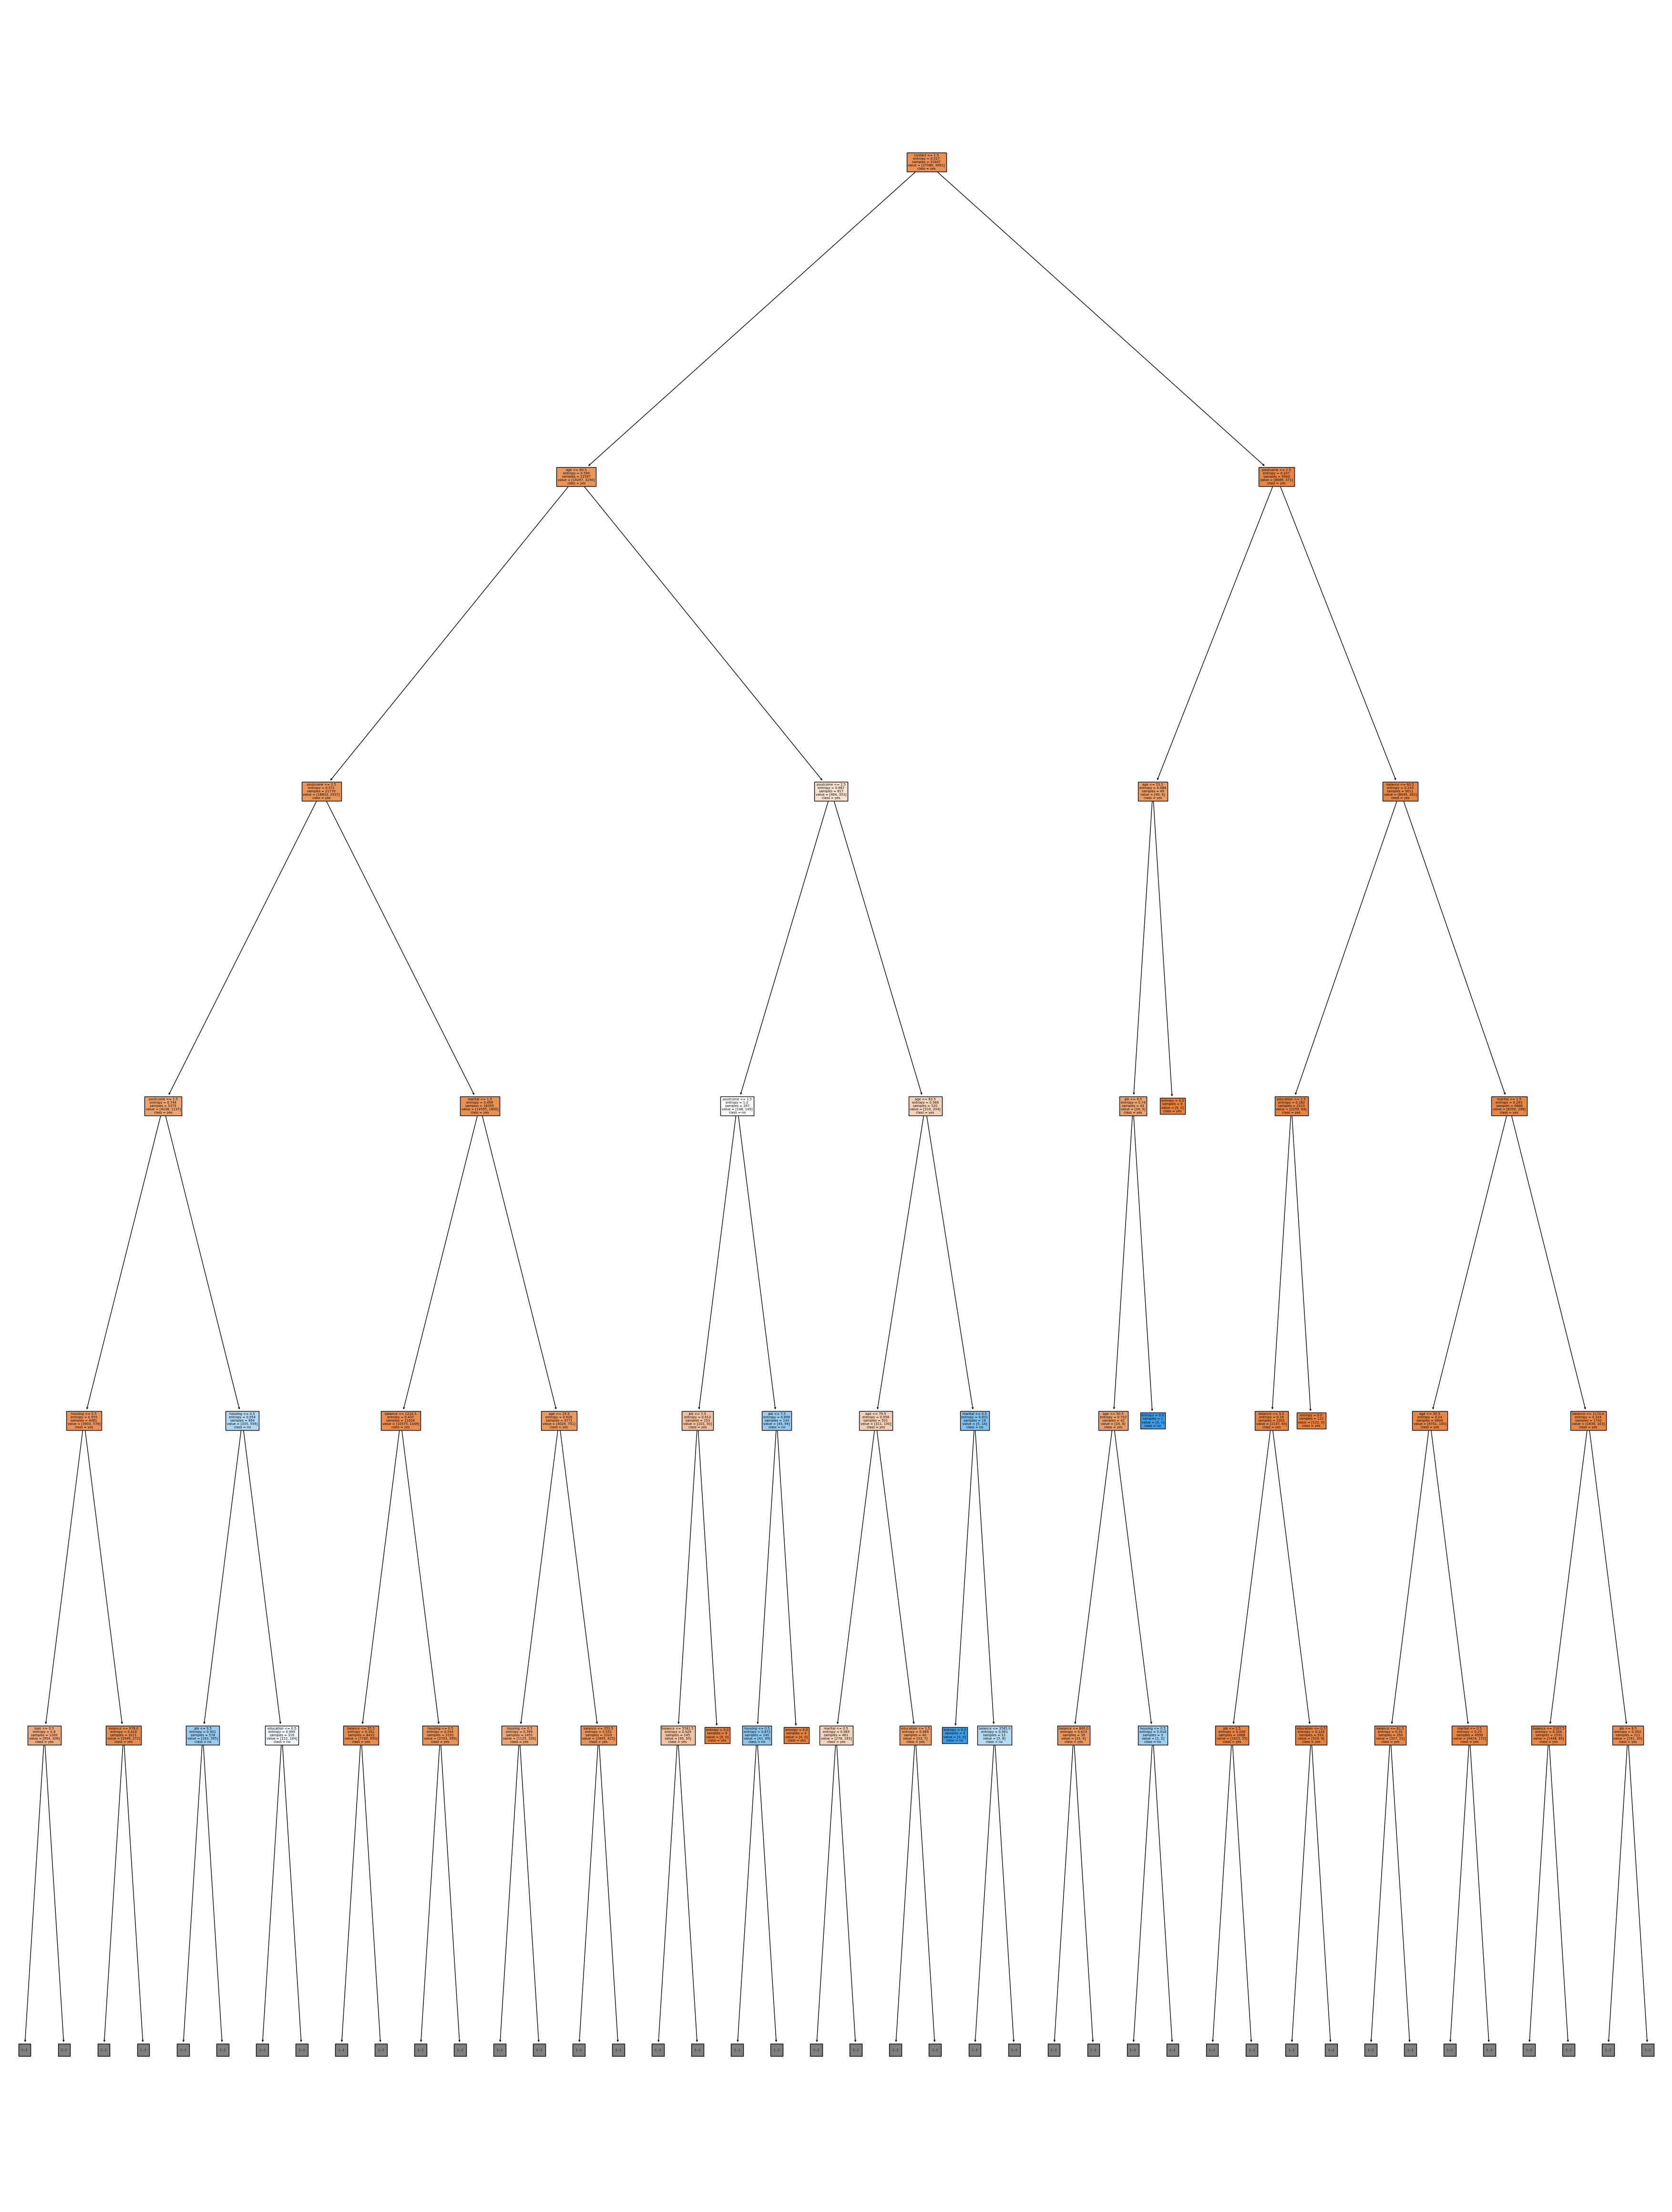

In [28]:
plt.figure(figsize=(45,60))
_=tree.plot_tree(dt,max_depth=5,feature_names=X.columns,class_names=['yes','no'],filled=True)